# pip & import

In [1]:
# pip보다 작업을 더욱 쉽게 만들어줌
!pip install micropip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 698.7 kB/s eta 0:00:00


In [2]:
# Matplotlib 기반, 벤 다이어그램을 그리는 데 사용
# 집합, 그룹 간의 관계를 시각화
!pip install matplotlib-venn

In [3]:
import micropip
await micropip.install("seaborn")

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # 시각화 폰트를 적용

fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

In [4]:
import os # 시스템
import random # 난수생성
import numpy as np # 행렬연산
import pandas as pd # 데이터 분석

In [5]:
# matplotlib 캐시 삭제
!rm -rf ~/.cache/matplotlib

In [6]:
# font 다운로드
!sudo apt-get install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,943 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and dire

In [7]:
# 글꼴 캐시 업데이트 및 추가
!sudo fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [9]:
plt.rc('font', family='NanumBarunGothic')
# 한글 폰트 사용 시 마이너스 폰트 깨짐 방지
plt.rc('axes', unicode_minus=False)

# seed 고정 & 함수정의

In [10]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

# Data Load

In [11]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount("/content/data")

Mounted at /content/data


In [12]:
# 딕셔너리를 간편하게 사용하는 것을 도와준다. 모델 class 처럼 사용 가능
# dot을 이용해 객체를 불러 사용. JSON 다룰때 유용.
import easydict
args = easydict.EasyDict()

# path
args.default_path = "/content/data/MyDrive/Playdata/Competitions/ML/DG/Data/" # 메인 경로
args.train_path = args.default_path + "train.csv" # train 데이터 경로
args.test_path = args.default_path + "test.csv" # train 데이터 경로

args.default_submission_path = args.default_path + "sample_submission.csv" # 예측결과(제출파일) 경로
args.result_path = "/content/data/MyDrive/Playdata/Competitions/ML/DG/Result/"

# 데이터 분석을 위한 변수들
# 난수 생성 제어 => 같은 코드를 실행해도 동일한 결과를 얻기 위해서 설정
# 데이터 분할 및 모델 초기화 때 유용.
args.random_state = 42
args.results = [] # 결과 저장 리스트

In [13]:
# Data를 불러와 DataFrame화
train_org = pd.read_csv(args.train_path)
test_org = pd.read_csv(args.test_path)

In [14]:
# 원본데이터 보존을 위해 복사를 해서 분석에 사용
train_df = train_org.copy()
test_df = test_org.copy()

In [15]:
# 대구광역시 중구 대신동 => 대구광역시 / 중구 / 대신동 => 각 컬럼 생성
train_df['시'] = train_df['시군구'].apply(lambda x: x.split()[0] if len(x.split()) > 0 else '')
train_df['군'] = train_df['시군구'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else '')
train_df['구'] = train_df['시군구'].apply(lambda x: x.split()[2] if len(x.split()) > 2 else '')

In [16]:
a = train_df['시군구'].head(1)
b = train_df['시'].head(1)
c = train_df['군'].head(1)
d = train_df['구'].head(1)

a, b, c, d

(0    대구광역시 중구 대신동
 Name: 시군구, dtype: object,
 0    대구광역시
 Name: 시, dtype: object,
 0    중구
 Name: 군, dtype: object,
 0    대신동
 Name: 구, dtype: object)

# EDA

## train, test 기간확인

In [17]:
display(f"train : {train_org.iloc[0]['사고일시']} ~ {train_org.iloc[-1]['사고일시']}")
display(f"test : {test_org.iloc[0]['사고일시']} ~ {test_org.iloc[-1]['사고일시']}")

'train : 2019-01-01 00 ~ 2021-12-31 23'

'test : 2022-01-01 01 ~ 2022-12-31 21'

# 데이터 전처리

## 날짜, 시간정보 생성

In [18]:
time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

# C# : Regex
train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다
train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거합니다

# 해당 과정을 test_x에 대해서도 반복해줍니다
test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류',\n       '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '시', '군', '구', '연', '월', '일', '시간'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간'], dtype='object')"

## 위치 정보 생성

In [19]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반',\n       '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '시', '군', '구', '연', '월', '일', '시간', '도시', '동'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시',\n       '구', '동'],\n      dtype='object')"

## 도로형태 정보 추출
ex) '단일로 - 기타'
- 도로형태1 : 단일로
- 도로형태2 : 기타

In [20]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',\n       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',\n       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '시',\n       '군', '구', '연', '월', '일', '시간', '도시', '동', '도로형태1', '도로형태2'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구', '동',\n       '도로형태1', '도로형태2'],\n      dtype='object')"

# 전처리 결과 확인

In [21]:
train_df.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '시',
       '군', '구', '연', '월', '일', '시간', '도시', '동', '도로형태1', '도로형태2'],
      dtype='object')

In [22]:
test_df.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구', '동',
       '도로형태1', '도로형태2'],
      dtype='object')

# train, test 데이터의 feature, target 분리
- train 컬럼과 test 컬럼이 동일하지 않다.
- basemodel에서는 test 기준으로 컬럼을 통일화 했다.

In [23]:
# test에서 ID 컬럼만 제외하고 test feature로 생성
test_features = test_df.drop(columns=['ID']).copy()
# test 컬럼과 train 컬럼 동일화 - test 컬럼을 사용해 train 컬럼 추출
train_features = train_df[test_features.columns].copy()
# target
train_target = train_df['ECLO'].copy()

# 범주형, 수치형 변환
- Label Encoder 사용

In [24]:
from sklearn.preprocessing import LabelEncoder # Label Encoder import

# Label Encoder 사용할 컬럼 추출
categorical_features = list(train_features.dtypes[train_features.dtypes == "object"].index)
# 추출된 컬럼 확인
display(categorical_features)

# 추출된 컬럼 Label Encoder 실행 (train, test)
for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(train_features[i])
    train_features[i]=le.transform(train_features[i])

    for case in np.unique(test_features[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    test_features[i]=le.transform(test_features[i])

display(train_features.head())
display(test_features.head())

['요일', '기상상태', '노면상태', '사고유형', '도시', '구', '동', '도로형태1', '도로형태2']

,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,6,2,0,0,2019,1,1,0,0,7,40,2,5
1,6,5,0,0,2019,1,1,0,0,1,4,2,5
2,6,2,0,0,2019,1,1,1,0,6,66,2,5
3,6,2,0,1,2019,1,1,2,0,4,79,2,5
4,6,2,0,1,2019,1,1,4,0,3,129,2,5


,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,5,2,0,0,2022,1,1,1,0,6,99,0,3
1,5,2,0,0,2022,1,1,1,0,6,168,2,5
2,5,2,0,1,2022,1,1,4,0,6,117,0,3
3,5,2,0,1,2022,1,1,4,0,6,126,2,5
4,5,2,0,1,2022,1,1,6,0,1,4,0,3


In [25]:
display(train_features.shape)
display(test_features.shape)

(39609, 13)

(10963, 13)

# 학습 및 예측

## 모델 import

In [26]:
from sklearn.model_selection import KFold               # 교차검증 - 모델 학습 및 평가
from sklearn.metrics import accuracy_score              # 모델의 정확도 측정
from sklearn.model_selection import StratifiedKFold     # ?
from sklearn import svm                                 # Support Vector Machine - 학습 알고리즘
from sklearn import datasets                            # 데이터셋
from sklearn.metrics import roc_curve, auc              # 이진분류모델 평가 시 사용
from sklearn.model_selection import RandomizedSearchCV  # HPO - 랜덤 하이퍼파라미터 찾기
from sklearn.ensemble import VotingClassifier           # voting

In [27]:
from sklearn.tree import DecisionTreeRegressor # 모델
from sklearn.metrics import mean_squared_error # 평가지표 MSE
from sklearn.model_selection import StratifiedKFold

In [28]:
# 교차 검증
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=0)

## Voting

In [29]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00


In [30]:
from xgboost import XGBRegressor                 # 부스팅 모델

In [31]:
from lightgbm import LGBMRegressor, plot_importance # 모델

In [32]:
from catboost import CatBoostRegressor

In [33]:
from sklearn.ensemble import RandomForestRegressor # 모델

In [34]:
seed_everything(42)
xgb_hp = {
    "random_state" : 42,
    "verbose": 0, # 로그
    "max_depth" : 11, # 깊이
    "n_estimators" : 1075, # 부스팅 단계수
    "learning_rate" : 0.001
}
xgb = XGBRegressor(**xgb_hp)

In [35]:
seed_everything(42)
light_hp= {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'rmse',  # 회귀 모델의 성능 측정 메트릭 (Root Mean Squared Error)
    'num_leaves': 921,
    'learning_rate': 0.01,
    'max_depth': 8,
    'verbose' : -1
}
light = LGBMRegressor(**light_hp)

In [36]:
seed_everything(42)
cat_hp = {
    "random_state" : 42,
    "verbose": 0, # 로그
    'n_estimators': 253,
    'max_depth': 5,
    'learning_rate': 0.1
}
cat = CatBoostRegressor(**cat_hp)

In [37]:
seed_everything(42)
randforest_hp = {
    "random_state": 42,
    "verbose": 0,  # 부스팅 단계 출력 안보이게 하기
    'n_estimators': 184,
    'max_depth': 6
}
randforest = RandomForestRegressor(**randforest_hp)  # RandomForestRegressor로 모델 변경

In [38]:
from sklearn.ensemble import VotingRegressor

In [39]:
seed_everything(42)
vote_model = VotingRegressor(
    estimators =[("xgb",xgb),
                 ("light", light),
                 ("cat", cat),
                 ("randforest", randforest)]
)

In [40]:
n_iter = 0
rmse_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
    n_iter += 1
    # 학습용, 검증용 데이터 구성
    train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
    train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

    # Voting Regressor 학습
    vote_model.fit(train_x, train_y)

    # 검증 데이터에 대한 예측
    valid_pred = vote_model.predict(valid_x)

    # 평가
    rmse = mean_squared_error(valid_y, valid_pred, squared=False)
    rmse_lst.append(rmse)
    print(f'{n_iter} 번째 Stratified K-Fold RMSE: {rmse}')

# 최종 평가
print('-'*50)
print(f'교차 검증 RMSE: {np.mean(rmse_lst)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:36:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


1 번째 Stratified K-Fold RMSE: 3.174944014074535


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:37:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


2 번째 Stratified K-Fold RMSE: 3.1288726734770242


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:37:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


3 번째 Stratified K-Fold RMSE: 3.163046550035901


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:37:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


4 번째 Stratified K-Fold RMSE: 3.136847685462587


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:38:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


5 번째 Stratified K-Fold RMSE: 3.207902584198217


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:39:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


6 번째 Stratified K-Fold RMSE: 3.176518362688763
--------------------------------------------------
교차 검증 RMSE: 3.164688644989505


In [41]:
vote_model

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=850,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...)),
                            ('light',
                             LGBMRegressor(learning_rate=0.05, metric='rmse',
                                           objective='regression',
                                           verbose=-1)),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x7c27f1ae1510>),
                            ('randforest',
                             RandomForestRegressor(random_state=42))])

In [42]:
pred = vote_model.predict(train_x)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(train_y, pred))
print(f'RMSE: {rmse}')

RMSE: 2.5991960635964366


## train_y, pred RMSE

In [43]:
pred_df = pd.DataFrame(pred, columns=['ECLO'])

# 평가

## 산포도

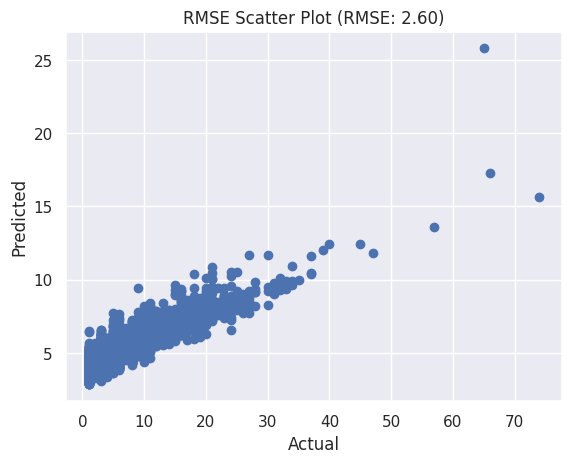

In [45]:
import matplotlib.pyplot as plt

# train_y와 pred의 RMSE를 계산
rmse = np.sqrt(mean_squared_error(train_y, pred))

# 산포도 그래프 생성
plt.scatter(train_y, pred)

# 그래프에 제목과 x축, y축 레이블 추가
plt.title(f'RMSE Scatter Plot (RMSE: {rmse:.2f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# 그래프 표시
plt.show()

# 제출

In [ ]:
prediction =  vote_model.predict(test_features)

In [ ]:
# Data를 불러와 DataFrame화
sample_submission = pd.read_csv(args.default_submission_path)

In [ ]:
baseline_submission = sample_submission.copy()
baseline_submission['ECLO'] = prediction
baseline_submission

,ID,ECLO
0,ACCIDENT_39609,4.543349
1,ACCIDENT_39610,4.181695
2,ACCIDENT_39611,6.543506
3,ACCIDENT_39612,5.734429
4,ACCIDENT_39613,5.273716
...,...,...
10958,ACCIDENT_50567,5.787146
10959,ACCIDENT_50568,4.766151
10960,ACCIDENT_50569,5.151864
10961,ACCIDENT_50570,5.308807


In [ ]:
from datetime import datetime, timedelta

In [ ]:
now = datetime.now() + timedelta(hours=9)
formatted_time = now.strftime("%Y%m%d_%H%M")
formatted_time

'20231205_1959'

In [ ]:
save_path = args.result_path + formatted_time + '.csv'
baseline_submission.to_csv(save_path, index=False)